# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 1000)

In [5]:
df

id             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0      2591820310  20141006T000000   365000.0         4       2.25         2070      8893     2.0           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700
1      7974200820  20140821T000000   865000.0         5       3.00         2900      6730     1.0           0     0          5      8        1830           1070      1977             0    98115  47.6784 -122.285           2370        6283
2      7701450110  20140815T000000  1038000.0         4       2.50         3770     10893     2.0           0     2          3     11        3770              0      1997             0    98006  47.5646 -122.129           3710        9685
3      9522300010  20150331T000000  1490000.0         3       3.50         4560     14608     2.0           0     2          3     12        4560              0      1990             0    98034  47.6995 -122.228           4050       14226
4      9510861140  20140714T000000   711000.0         3       2.50         2550      5376     2.0           0     0          3      9        2550              0      2004             0    98052  47.6647 -122.083           2250        4050
5      1761300310  20140827T000000   211000.0         4       2.00         1710      8288     1.5           0     0          3      7        1710              0      1970             0    98031  47.3947 -122.174           1710        7200
6      7732410120  20140819T000000   790000.0         4       2.50         2690      8036     2.0           0     0          4      9        2690              0      1987             0    98007  47.6596 -122.144           2420        8087
7      7010701383  20141017T000000   680000.0         3       2.50         1800      4400     1.0           0     0          5      7        1350            450      1970             0    98199  47.6599 -122.396           1920        4400
8       291310170  20140804T000000   384500.0         3       2.50         1600      2610     2.0           0     0          3      8        1600              0      2005             0    98027  47.5344 -122.068           1445        1288
9      4232901990  20140516T000000   605000.0         2       1.00          910      3600     1.0           0     0          4      7         910              0      1909             0    98119  47.6341 -122.361           1720        3600
10     6840701125  20150422T000000   638000.0         3       1.00         1830      4400     1.5           0     0          4      8        1720            110      1930             0    98122  47.6052 -122.300           1650        4400
11     3971700580  20150303T000000   385000.0         3       1.75         1930     14389     1.0           0     0          3      7        1130            800      1963          1998    98155  47.7733 -122.317           1730       14378
12     4202400078  20150128T000000   175000.0         2       1.00         1410      7000     1.0           0     0          3      7        1410              0      1968             0    98055  47.4908 -122.223           1540        6000
13     6064800090  20150507T000000   365000.0         3       2.25         1960      1985     2.0           0     0          3      7        1750            210      2003             0    98118  47.5419 -122.289           1760        1985
14     2626119028  20150323T000000   160000.0         3       1.00         1140      3240     1.5           0     0          4      6        1140              0      1910             0    98014  47.7093 -121.364           1140        4700
15     3303980660  20140603T000000  1070000.0         4       3.75         4130     12320     2.0           0     0          3     11        4130              0      2001             0    980

In [6]:
df.head()

id             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  2591820310  20141006T000000   365000.0         4       2.25         2070      8893     2.0           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700
1  7974200820  20140821T000000   865000.0         5       3.00         2900      6730     1.0           0     0          5      8        1830           1070      1977             0    98115  47.6784 -122.285           2370        6283
2  7701450110  20140815T000000  1038000.0         4       2.50         3770     10893     2.0           0     2          3     11        3770              0      1997             0    98006  47.5646 -122.129           3710        9685
3  9522300010  20150331T000000  1490000.0         3       3.50         4560     14608     2.0           0     2          3     12        4560              0      1990             0    98034  47.6995 -122.228           4050       14226
4  9510861140  20140714T000000   711000.0         3       2.50         2550      5376     2.0           0     0          3      9        2550              0      2004             0    98052  47.6647 -122.083           2250        4050

In [7]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living      sqft_lot        floors    waterfront          view     condition         grade    sqft_above  sqft_basement      yr_built  yr_renovated       zipcode           lat          long  sqft_living15     sqft_lot15
count  1.729000e+04  1.729000e+04  17290.000000  17290.000000  17290.000000  1.729000e+04  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000   17290.000000
mean   4.565502e+09  5.407395e+05      3.372470      2.111943   2081.464604  1.524340e+04      1.490312      0.007981      0.238519      3.408502      7.654425   1789.306015     292.158589   1970.792019     83.806304  98078.193175     47.560058   -122.214258    1987.986698   12873.475824
std    2.874656e+09  3.733190e+05      0.939346      0.770476    920.018539  4.230462e+04      0.538909      0.088985      0.775229      0.651296      1.174718    829.265107     443.151874     29.343516    400.329376     53.607949      0.138412      0.140857     684.802635   27227.437583
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000  5.720000e+02      1.000000      0.000000      0.000000      1.000000      1.000000    290.000000       0.000000   1900.000000      0.000000  98001.000000     47.155900   -122.519000     399.000000     659.000000
25%    2.114701e+09  3.210000e+05      3.000000      1.500000   1430.000000  5.081250e+03      1.000000      0.000000      0.000000      3.000000      7.000000   1200.000000       0.000000   1951.000000      0.000000  98033.000000     47.471200   -122.329000    1490.000000    5111.250000
50%    3.903650e+09  4.500000e+05      3.000000      2.250000   1920.000000  7.642000e+03      1.500000      0.000000      0.000000      3.000000      7.000000   1560.000000       0.000000   1974.000000      0.000000  98065.000000     47.571600   -122.230000    1840.000000    7622.500000
75%    7.301150e+09  6.450000e+05      4.000000      2.500000   2550.000000  1.072575e+04      2.000000      0.000000      0.000000      4.000000      8.000000   2214.500000     560.000000   1996.000000      0.000000  98118.000000     47.677900   -122.126000    2360.000000   10101.750000
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06      3.500000      1.000000      4.000000      5.000000     13.000000   9410.000000    4820.000000   2015.000000   2015.000000  98199.000000     47.777600   -121.315000    6210.000000  858132.000000

In [8]:
df.shape

(17290, 21)

In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [10]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [11]:
df.isna().mean()

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [13]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living      sqft_lot        floors    waterfront          view     condition         grade    sqft_above  sqft_basement      yr_built  yr_renovated       zipcode           lat          long  sqft_living15     sqft_lot15
count  1.729000e+04  1.729000e+04  17290.000000  17290.000000  17290.000000  1.729000e+04  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000   17290.000000
mean   4.565502e+09  5.407395e+05      3.372470      2.111943   2081.464604  1.524340e+04      1.490312      0.007981      0.238519      3.408502      7.654425   1789.306015     292.158589   1970.792019     83.806304  98078.193175     47.560058   -122.214258    1987.986698   12873.475824
std    2.874656e+09  3.733190e+05      0.939346      0.770476    920.018539  4.230462e+04      0.538909      0.088985      0.775229      0.651296      1.174718    829.265107     443.151874     29.343516    400.329376     53.607949      0.138412      0.140857     684.802635   27227.437583
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000  5.720000e+02      1.000000      0.000000      0.000000      1.000000      1.000000    290.000000       0.000000   1900.000000      0.000000  98001.000000     47.155900   -122.519000     399.000000     659.000000
25%    2.114701e+09  3.210000e+05      3.000000      1.500000   1430.000000  5.081250e+03      1.000000      0.000000      0.000000      3.000000      7.000000   1200.000000       0.000000   1951.000000      0.000000  98033.000000     47.471200   -122.329000    1490.000000    5111.250000
50%    3.903650e+09  4.500000e+05      3.000000      2.250000   1920.000000  7.642000e+03      1.500000      0.000000      0.000000      3.000000      7.000000   1560.000000       0.000000   1974.000000      0.000000  98065.000000     47.571600   -122.230000    1840.000000    7622.500000
75%    7.301150e+09  6.450000e+05      4.000000      2.500000   2550.000000  1.072575e+04      2.000000      0.000000      0.000000      4.000000      8.000000   2214.500000     560.000000   1996.000000      0.000000  98118.000000     47.677900   -122.126000    2360.000000   10101.750000
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06      3.500000      1.000000      4.000000      5.000000     13.000000   9410.000000    4820.000000   2015.000000   2015.000000  98199.000000     47.777600   -121.315000    6210.000000  858132.000000

In [29]:
import seaborn as sns

/Users/AMINO/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


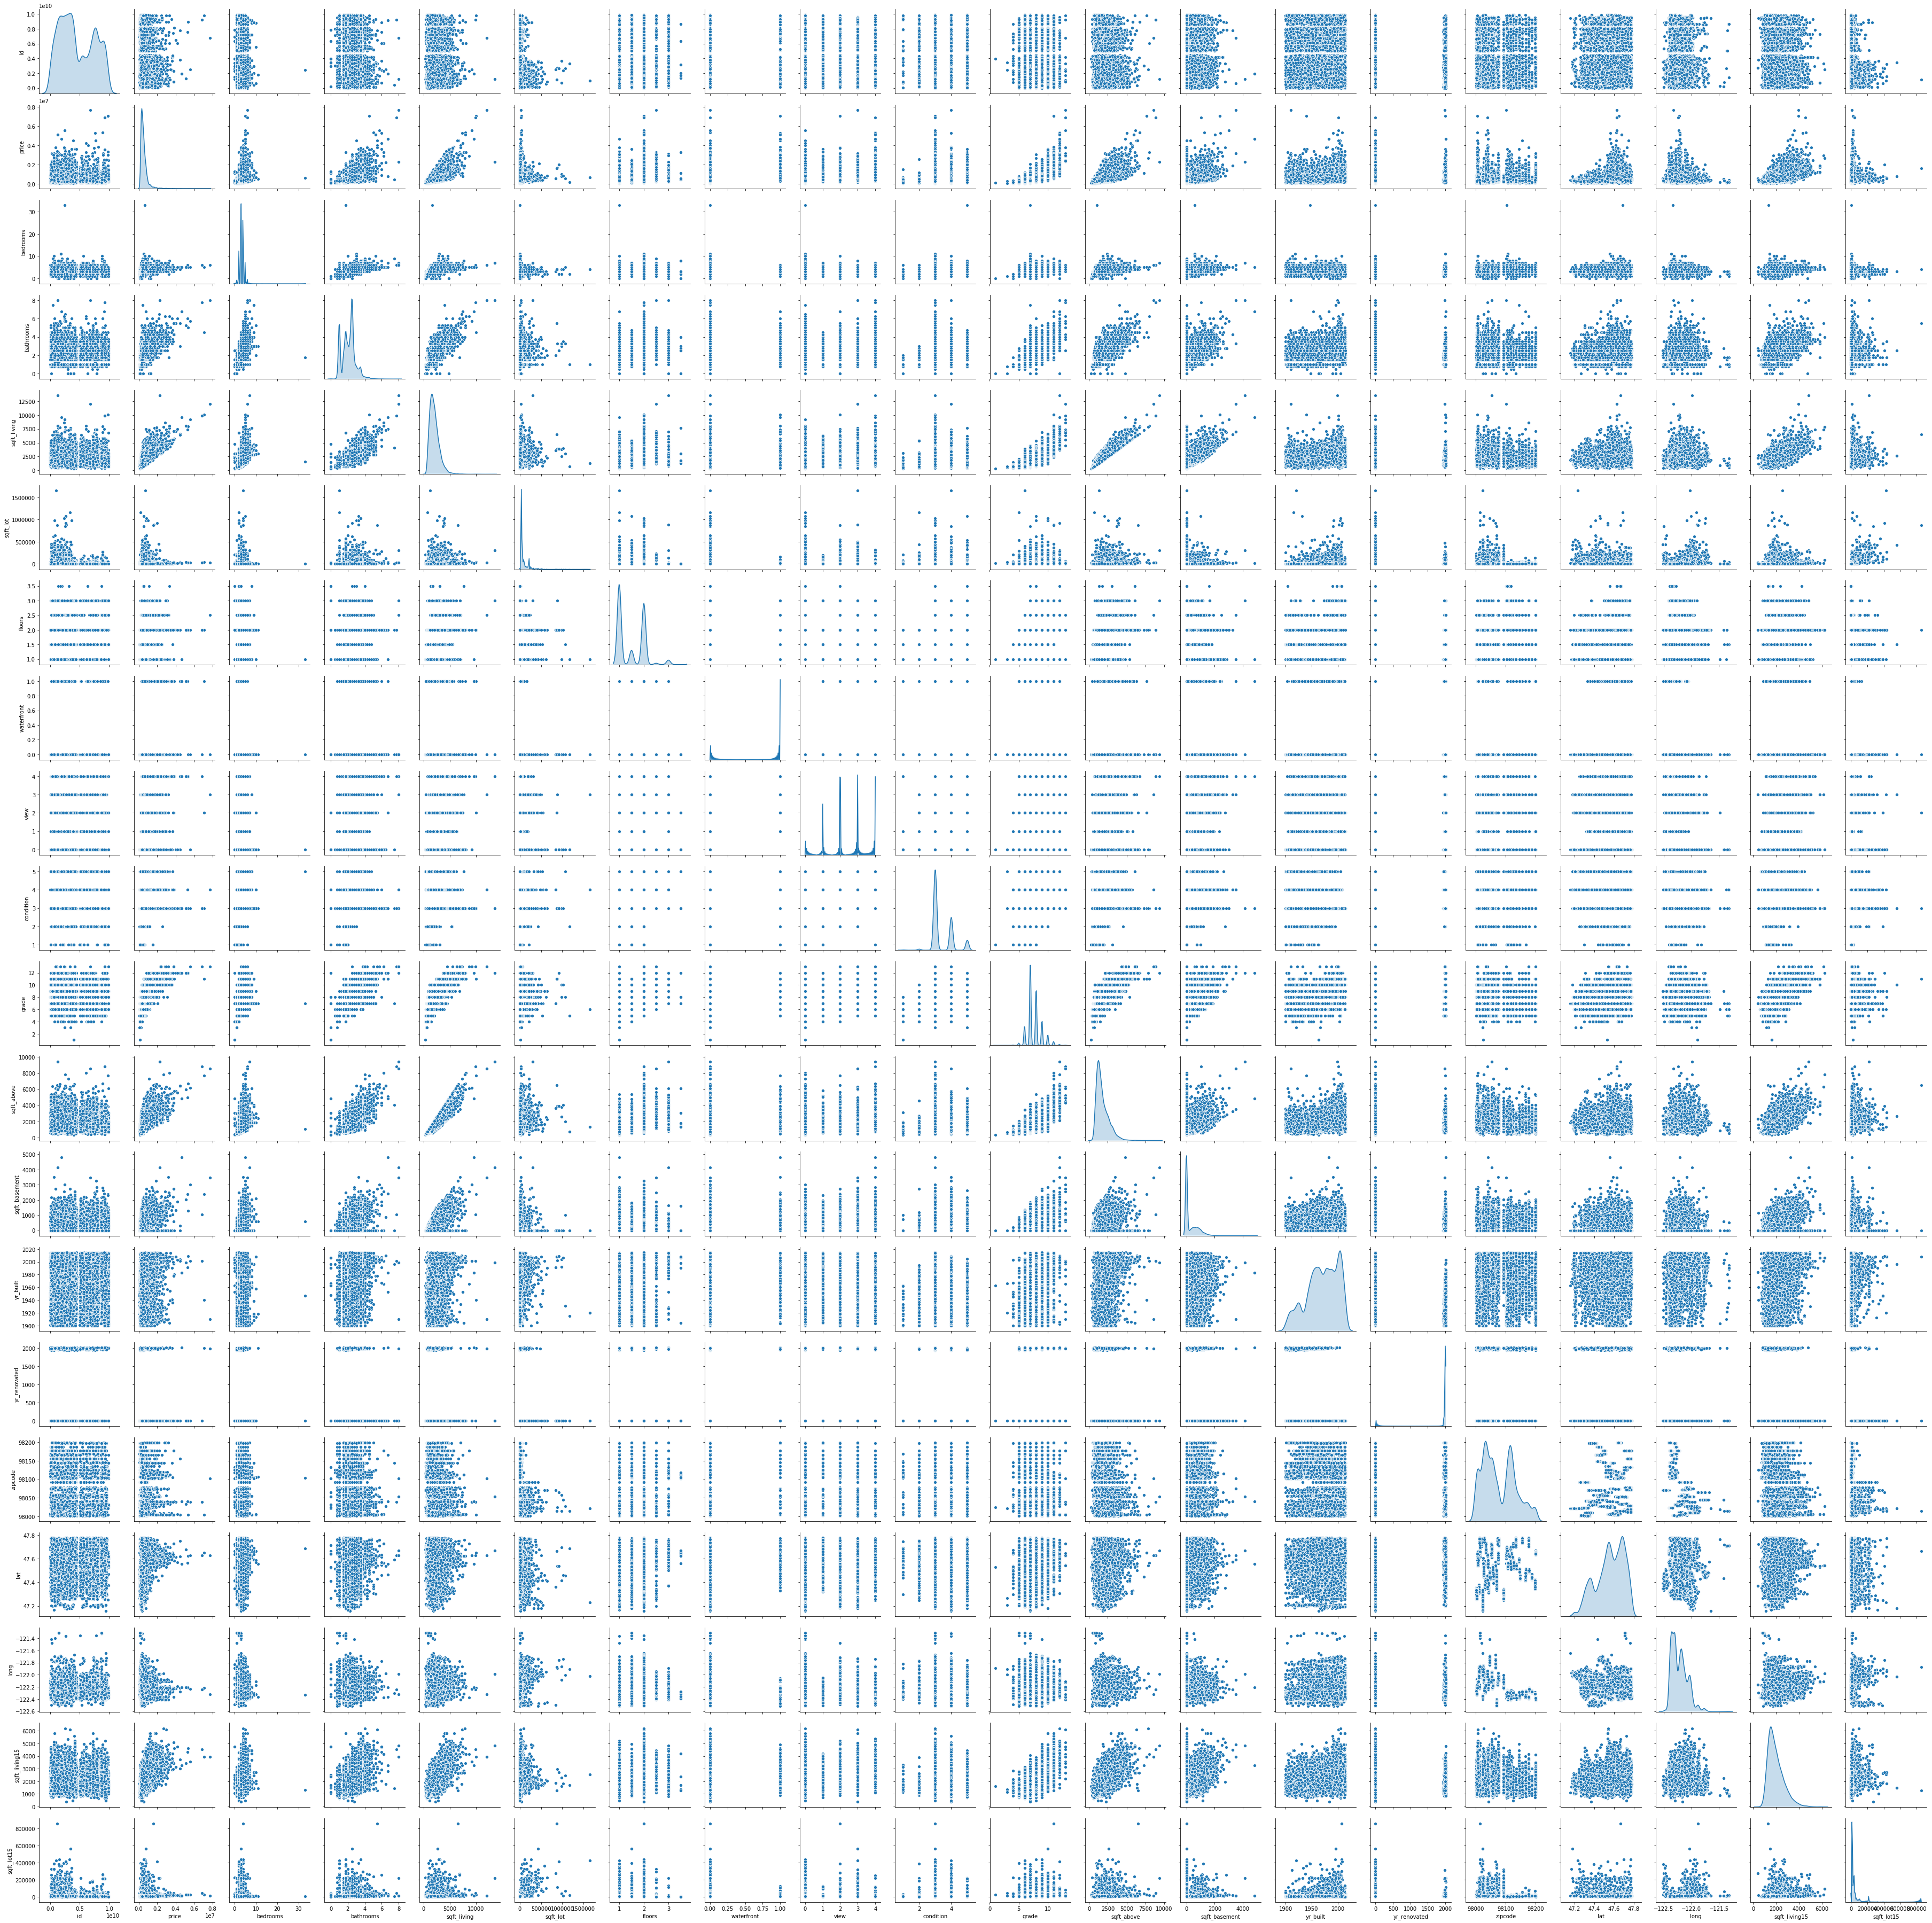

In [31]:
sns.pairplot(df, diag_kind="kde", height=2.5)

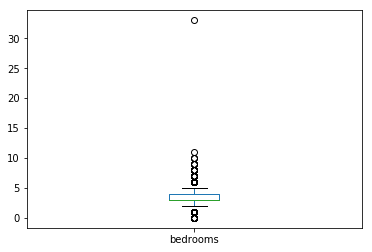

In [15]:
df['bedrooms'].plot(kind='box')

In [32]:
df.sort_values('bedrooms', ascending=False)

id             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
8597   2402100895  20140625T000000   640000.0        33       1.75         1620      6000     1.0           0     0          5      7        1040            580      1947             0    98103  47.6878 -122.331           1330        4700
2356   1773100755  20140821T000000   520000.0        11       3.00         3000      4960     2.0           0     0          3      7        2400            600      1918          1999    98106  47.5560 -122.363           1420        4960
11181   627300145  20140814T000000  1148000.0        10       5.25         4590     10920     1.0           0     2          3      9        2500           2090      2008             0    98004  47.5861 -122.113           2730       10400
3680   8812401450  20141229T000000   660000.0        10       3.00         2920      3745     2.0           0     0          4      7        1860           1060      1913             0    98105  47.6635 -122.320           1810        3745
17114  5566100170  20141029T000000   650000.0        10       2.00         3610     11914     2.0           0     0          4      7        3010            600      1958             0    98006  47.5705 -122.175           2040       11914
14156  2902200015  20150106T000000   700000.0         9       3.00         3680      4400     2.0           0     0          3      7        2830            850      1908             0    98102  47.6374 -122.324           1960        2450
8446   8823901445  20150313T000000   934000.0         9       3.00         2820      4480     2.0           0     0          3      7        1880            940      1918             0    98105  47.6654 -122.307           2460        4400
8207   8823900290  20150317T000000  1400000.0         9       4.00         4620      5508     2.5           0     0          3     11        3870            750      1915             0    98105  47.6684 -122.309           2710        4320
3425    424049043  20140811T000000   450000.0         9       7.50         4050      6504     2.0           0     0          3      7        4050              0      1996             0    98144  47.5923 -122.301           1448        3866
8624   1997200215  20140507T000000   599999.0         9       4.50         3830      6988     2.5           0     0          3      7        2450           1380      1938             0    98103  47.6927 -122.338           1460        6291
10700  1338600225  20140528T000000  1970000.0         8       3.50         4440      6480     2.0           0     3          5     10        3140           1300      1959             0    98112  47.6310 -122.303           4440        8640
1015   1652500060  20140711T000000  1650000.0         8       2.75         4040     20666     1.0           0     0          4      9        2020           2020      1962             0    98004  47.6340 -122.221           3670       20500
10606  9126101740  20141204T000000   490000.0         8       5.00         2800      2580     2.0           0     0          3      8        1880            920      1997             0    98122  47.6086 -122.303           1800        2580
14137  7226500100  20150219T000000   373000.0         8       3.00         2850     12714     1.0           0     0          3      7        2850              0      1959             0    98055  47.4859 -122.205           1480        4942
9434   2769600590  20141016T000000   900000.0         8       4.00         4020      7500     1.0           0     0          3      8        2010           2010      1968             0    98107  47.6732 -122.363           1560        3737
3757   1346300150  20141020T000000  3300000.0         8       4.00         7710     11750     3.5           0     0          5     12        6090           1620      1904             0    981

In [25]:
df[(df['bedrooms']<=11)&(df['bedrooms']>0)].shape

(17277, 21)

In [26]:
df.shape

(17290, 21)

## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

In [75]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [81]:
sel_df = df[['price', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view','condition', 'grade','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode' , 'grade', 'lat', 'long']]

In [82]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront      view  condition     grade  sqft_above  sqft_basement  yr_built  yr_renovated   zipcode       lat      long  sqft_living15  sqft_lot15
id             1.000000 -0.015644 -0.001529   0.003833    -0.014251 -0.129837  0.017126    0.000101  0.012594  -0.014272  0.003163   -0.013932      -0.003516  0.013697     -0.019560 -0.008166 -0.001865  0.017388      -0.007494   -0.139605
price         -0.015644  1.000000  0.305106   0.524335     0.703540  0.086803  0.256985    0.275779  0.395485   0.036099  0.666215    0.607760       0.323312  0.056450      0.117770 -0.048958  0.302394  0.019327       0.585567    0.081423
bedrooms      -0.001529  0.305106  1.000000   0.507867     0.570428  0.029375  0.172975   -0.008581  0.079741   0.025266  0.354679    0.472492       0.300085  0.153769      0.013679 -0.147515 -0.002170  0.124279       0.387589    0.026665
bathrooms      0.003833  0.524335  0.507867   1.000000     0.755270  0.085470  0.497967    0.065848  0.188817  -0.122976  0.664191    0.686853       0.282700  0.507761      0.048140 -0.201527  0.023074  0.221308       0.568080    0.086499
sqft_living   -0.014251  0.703540  0.570428   0.755270     1.000000  0.166810  0.357169    0.109738  0.283336  -0.061530  0.762929    0.876696       0.435529  0.319397      0.051448 -0.195893  0.052646  0.234453       0.755066    0.179570
sqft_lot      -0.129837  0.086803  0.029375   0.085470     0.166810  1.000000 -0.002205    0.015356  0.073058  -0.013715  0.110320    0.180755       0.008065  0.054228      0.004520 -0.126590 -0.082029  0.226190       0.136959    0.701875
floors         0.017126  0.256985  0.172975   0.497967     0.357169 -0.002205  1.000000    0.025132  0.025883  -0.259230  0.458984    0.528509      -0.247481  0.483657      0.005985 -0.060560  0.048227  0.128795       0.283933   -0.008170
waterfront     0.000101  0.275779 -0.008581   0.065848     0.109738  0.015356  0.025132    1.000000  0.407565   0.009608  0.092234    0.077162       0.083433 -0.021981      0.094268  0.034282 -0.013331 -0.042728       0.091090    0.026895
view           0.012594  0.395485  0.079741   0.188817     0.283336  0.073058  0.025883    0.407565  1.000000   0.045060  0.249554    0.164747       0.279939 -0.049593      0.091291  0.089475  0.003820 -0.077572       0.279999    0.073185
condition     -0.014272  0.036099  0.025266  -0.122976    -0.061530 -0.013715 -0.259230    0.009608  0.045060   1.000000 -0.142066   -0.157466       0.166923 -0.358921     -0.060969  0.007068 -0.009927 -0.109200      -0.094307   -0.007125
grade          0.003163  0.666215  0.354679   0.664191     0.762929  0.110320  0.458984    0.092234  0.249554  -0.142066  1.000000    0.758247       0.165003  0.448003      0.007988 -0.184946  0.116196  0.198369       0.715745    0.116062
sqft_above    -0.013932  0.607760  0.472492   0.686853     0.876696  0.180755  0.528509    0.077162  0.164747  -0.157466  0.758247    1.000000      -0.051199  0.424328      0.020413 -0.259745  0.001374  0.338192       0.731077    0.193874
sqft_basement -0.003516  0.323312  0.300085   0.282700     0.435529  0.008065 -0.247481    0.083433  0.279939   0.166923  0.165003   -0.051199       1.000000 -0.130948      0.068611  0.079368  0.106727 -0.146112       0.199521    0.010007
yr_built       0.013697  0.056450  0.153769   0.507761     0.319397  0.054228  0.483657   -0.021981 -0.049593  -0.358921  0.448003    0.424328      -0.130948  1.000000     -0.222668 -0.348366 -0.145220  0.407768       0.332340    0.076624
yr_renovated  -0.019560  0.117770  0.013679   0.048140     0.051448  0.004520  0.005985    0.094268  0.091291  -0.060969  0.007988    0.020413       0.068611 -0.222668      1.000000  0.063641  0.027804 -0.061159      -0.010221    0.004489
zipcode       -0.008166 -0.048958 -0.147515  -0.201527    -0.195893 -0.126590 -0.060560    0.034282  0.089475   0.007068 -0.184946   -0.259745       0.079368 -0.348366      0.063641  1.000000  0.26

In [83]:
sel_df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront      view  condition     grade  sqft_basement  yr_built  yr_renovated   zipcode     grade       lat      long
price          1.000000  0.305106   0.524335     0.703540  0.086803  0.256985    0.275779  0.395485   0.036099  0.666215       0.323312  0.056450      0.117770 -0.048958  0.666215  0.302394  0.019327
bedrooms       0.305106  1.000000   0.507867     0.570428  0.029375  0.172975   -0.008581  0.079741   0.025266  0.354679       0.300085  0.153769      0.013679 -0.147515  0.354679 -0.002170  0.124279
bathrooms      0.524335  0.507867   1.000000     0.755270  0.085470  0.497967    0.065848  0.188817  -0.122976  0.664191       0.282700  0.507761      0.048140 -0.201527  0.664191  0.023074  0.221308
sqft_living    0.703540  0.570428   0.755270     1.000000  0.166810  0.357169    0.109738  0.283336  -0.061530  0.762929       0.435529  0.319397      0.051448 -0.195893  0.762929  0.052646  0.234453
sqft_lot       0.086803  0.029375   0.085470     0.166810  1.000000 -0.002205    0.015356  0.073058  -0.013715  0.110320       0.008065  0.054228      0.004520 -0.126590  0.110320 -0.082029  0.226190
floors         0.256985  0.172975   0.497967     0.357169 -0.002205  1.000000    0.025132  0.025883  -0.259230  0.458984      -0.247481  0.483657      0.005985 -0.060560  0.458984  0.048227  0.128795
waterfront     0.275779 -0.008581   0.065848     0.109738  0.015356  0.025132    1.000000  0.407565   0.009608  0.092234       0.083433 -0.021981      0.094268  0.034282  0.092234 -0.013331 -0.042728
view           0.395485  0.079741   0.188817     0.283336  0.073058  0.025883    0.407565  1.000000   0.045060  0.249554       0.279939 -0.049593      0.091291  0.089475  0.249554  0.003820 -0.077572
condition      0.036099  0.025266  -0.122976    -0.061530 -0.013715 -0.259230    0.009608  0.045060   1.000000 -0.142066       0.166923 -0.358921     -0.060969  0.007068 -0.142066 -0.009927 -0.109200
grade          0.666215  0.354679   0.664191     0.762929  0.110320  0.458984    0.092234  0.249554  -0.142066  1.000000       0.165003  0.448003      0.007988 -0.184946  1.000000  0.116196  0.198369
sqft_basement  0.323312  0.300085   0.282700     0.435529  0.008065 -0.247481    0.083433  0.279939   0.166923  0.165003       1.000000 -0.130948      0.068611  0.079368  0.165003  0.106727 -0.146112
yr_built       0.056450  0.153769   0.507761     0.319397  0.054228  0.483657   -0.021981 -0.049593  -0.358921  0.448003      -0.130948  1.000000     -0.222668 -0.348366  0.448003 -0.145220  0.407768
yr_renovated   0.117770  0.013679   0.048140     0.051448  0.004520  0.005985    0.094268  0.091291  -0.060969  0.007988       0.068611 -0.222668      1.000000  0.063641  0.007988  0.027804 -0.061159
zipcode       -0.048958 -0.147515  -0.201527    -0.195893 -0.126590 -0.060560    0.034282  0.089475   0.007068 -0.184946       0.079368 -0.348366      0.063641  1.000000 -0.184946  0.264712 -0.563027
grade          0.666215  0.354679   0.664191     0.762929  0.110320  0.458984    0.092234  0.249554  -0.142066  1.000000       0.165003  0.448003      0.007988 -0.184946  1.000000  0.116196  0.198369
lat            0.302394 -0.002170   0.023074     0.052646 -0.082029  0.048227   -0.013331  0.003820  -0.009927  0.116196       0.106727 -0.145220      0.027804  0.264712  0.116196  1.000000 -0.131514
long           0.019327  0.124279   0.221308     0.234453  0.226190  0.128795   -0.042728 -0.077572  -0.109200  0.198369      -0.146112  0.407768     -0.061159 -0.563027  0.198369 -0.131514  1.000000

In [80]:
amino_model = ols(formula='price~bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + sqft_basement + yr_built + yr_renovated + zipcode + grade + lat + long', data=df).fit()
amino_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2654.
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:58:19   Log-Likelihood:            -2.3603e+05
No. Observations:               17290   AIC:                         4.721e+05
Df Residuals:                   17274   BIC:                         4.722e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.218e+06   3.28e+06      2.202      0.028    7.92e+05    1.36e+07
bedrooms      -3.601e+04   2116.487    -17.015      0.000   -4.02e+04   -3.19e+04
bathrooms      4.091e+04   3701.085     11.053      0.000    3.37e+04    4.82e+04
sqft_living     195.5318      3.821     51.170      0.000     188.042     203.022
sqft_lot         -0.0425      0.039     -1.098      0.272      -0.118       0.033
floors         3680.9242   4069.517      0.905      0.366   -4295.742    1.17e+04
waterfront     5.907e+05   1.93e+04     30.572      0.000    5.53e+05    6.29e+05
view           5.454e+04   2387.421     22.847      0.000    4.99e+04    5.92e+04
condition      2.554e+04   2671.670      9.560      0.000    2.03e+04    3.08e+04
sqft_basement   -35.4768      4.929     -7.197      0.000     -45.138     -25.815
yr_built      -2667.6898     82.638    -32.282      0.000   -2829.669   -2505.711
yr_renovated     15.9766      4.174      3.828      0.000       7.796      24.157
zipcode        -587.4225     37.413    -15.701      0.000    -660.756    -514.090
grade           9.94e+04   2357.783     42.159      0.000    9.48e+04    1.04e+05
lat            6.071e+05   1.22e+04     49.656      0.000    5.83e+05    6.31e+05
long          -2.135e+05   1.47e+04    -14.539      0.000   -2.42e+05   -1.85e+05
==============================================================================
Omnibus:                    15096.245   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1621317.174
Skew:                           3.705   Prob(JB):                         0.00
Kurtosis:                      49.857   Cond. No.                     2.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [85]:
# your code here
df['price'].describe()

count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
df['price'].value

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
## Can be beneficial for comparative market analysis (CMA) 
# is the determination of a real estate property’s value in comparison with similar recently sold properties in the same area.
# we have to find a few (we recommend 3-5) comparables – or comps – i.e., 
# properties that are similar to ours in terms of size, age, location, and other features.

In [ ]:
#your code here


### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column

In [ ]:
#your code here 

### Non-linear transformations

### 4.4) Create a polynomial feature for two of your continuous variables


In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable) 

In [ ]:
# your code here

## Step 5: Train Test Split

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

### 5.1) Perform a train test split of the data.

In [1]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [2]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [3]:
#your code here 

### 5.4) Fit the model to the training data.

In [4]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [5]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [6]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here

### 6.2) After removing the features, rerun steps 5 and see if you r new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall

## Step 8:  Refit your best model to the entire dataset

## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/